# Evaluation notebook
This notebook is meant to be executed after 'main.py', since it uses its stored results for visualisation purposes.
The first cell contains the parameters to be tuned for a correct execution. Here's a quick explanation:
- datapath: string, containing the folder where results have been stored by 'main.py'. Note that results are saved as .txt files;
- destination: string, containing the folder where images created in this notebook should be saved. The default choice is to place them in the report directory, to have them ready for the final report;
- subjects: list of integers, containing the different configurations of subjects on which models have been tested;
- model_names: list of strings, containing the names of models that have been deployed.

In [1]:
datapath = "./data/results/"
subjects = [1,2,3,4,23]
model_names = ["Convolutional", "Convolutional1DRecurrent", "Convolutional2DRecurrent", "ConvolutionalDeepRecurrent"]

Import useful packeges.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Make sure that the destination folder exists.

# Task A

In [3]:
task = "A"
results = np.zeros([4,len(subjects),len(model_names)])
print("Results matrix has shape", results.shape)
for model in enumerate(model_names):
    for s in enumerate(subjects):
        filename = task + "_" + model[1] + "_" + str(s[1]) + ".txt"
        print("Loading", filename)
        results[:,s[0], model[0]] = np.loadtxt(datapath + filename, comments="#", delimiter="\n", unpack=False)

Results matrix has shape (4, 5, 4)
Loading A_Convolutional_1.txt
Loading A_Convolutional_2.txt
Loading A_Convolutional_3.txt
Loading A_Convolutional_4.txt
Loading A_Convolutional_23.txt
Loading A_Convolutional1DRecurrent_1.txt
Loading A_Convolutional1DRecurrent_2.txt
Loading A_Convolutional1DRecurrent_3.txt
Loading A_Convolutional1DRecurrent_4.txt
Loading A_Convolutional1DRecurrent_23.txt
Loading A_Convolutional2DRecurrent_1.txt
Loading A_Convolutional2DRecurrent_2.txt
Loading A_Convolutional2DRecurrent_3.txt
Loading A_Convolutional2DRecurrent_4.txt
Loading A_Convolutional2DRecurrent_23.txt
Loading A_ConvolutionalDeepRecurrent_1.txt
Loading A_ConvolutionalDeepRecurrent_2.txt
Loading A_ConvolutionalDeepRecurrent_3.txt
Loading A_ConvolutionalDeepRecurrent_4.txt
Loading A_ConvolutionalDeepRecurrent_23.txt


## One-Shot classification results
These results consist of the classifications performed with the null class, which are stored on the top matrix.

In [4]:
res_A1 = pd.DataFrame(results[0,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A1

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.8986,0.8905,0.9073,0.8990
S2,0.7543,0.7559,0.7519,0.7553
S3,0.8188,0.8078,0.8304,0.8136
S4,0.8644,0.8720,0.8706,0.8755
S2+S3,0.7883,0.7862,0.7848,0.7858


<Figure size 432x288 with 0 Axes>

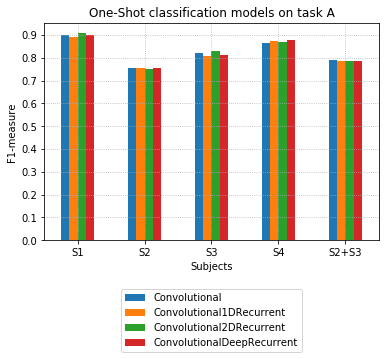

In [5]:
plt.figure()
res_A1.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("One-Shot classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_nullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Activity classification (Cascade) results
These results consist of the classifications performed without the null class, which are stored on the bottom matrix.

In [6]:
res_A2 = pd.DataFrame(results[2,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A2

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.9369,0.9325,0.9435,0.9407
S2,0.7774,0.7743,0.7712,0.7830
S3,0.8972,0.8985,0.9007,0.8949
S4,0.8834,0.8844,0.8869,0.8824
S2+S3,0.8383,0.8314,0.8302,0.8378


<Figure size 432x288 with 0 Axes>

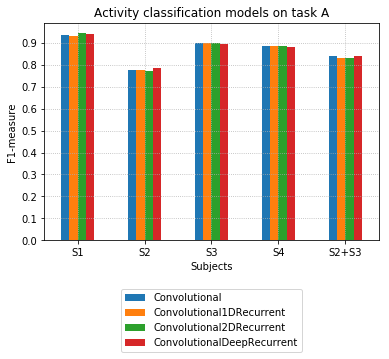

In [7]:
plt.figure()
res_A2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Activity classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_nonullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Cascade classification results

In [8]:
res_A_TS = pd.DataFrame(results[3,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A_TS

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.8983,0.9056,0.9056,0.9080
S2,0.7505,0.7535,0.7604,0.7665
S3,0.8481,0.8148,0.8420,0.8358
S4,0.8648,0.8702,0.8762,0.8729
S2+S3,0.7870,0.7945,0.7918,0.8049


<Figure size 432x288 with 0 Axes>

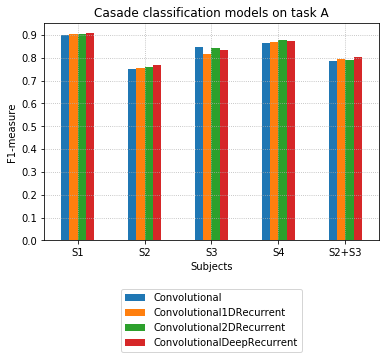

In [9]:
plt.figure()
res_A_TS.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Casade classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_cascade.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between classifications with and without null class

In [10]:
res_A_comp = pd.concat([res_A1, res_A2], axis=1, keys=["with null class", "without null class"])
res_A_comp

with null class                                                    \
        Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1             0.8986                   0.8905                   0.9073   
S2             0.7543                   0.7559                   0.7519   
S3             0.8188                   0.8078                   0.8304   
S4             0.8644                   0.8720                   0.8706   
S2+S3          0.7883                   0.7862                   0.7848   

                                 without null class                           \
      ConvolutionalDeepRecurrent      Convolutional Convolutional1DRecurrent   
S1                        0.8990             0.9369                   0.9325   
S2                        0.7553             0.7774                   0.7743   
S3                        0.8136             0.8972                   0.8985   
S4                        0.8755             0.8834                   0.8844   
S2+S3                     0.7858             0.8383                   0.8314   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.9435                     0.9407  
S2                      0.7712                     0.7830  
S3                      0.9007                     0.8949  
S4                      0.8869                     0.8824  
S2+S3                   0.8302                     0.8378

<Figure size 432x288 with 0 Axes>

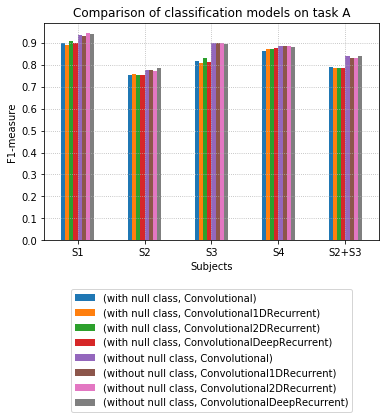

In [11]:
plt.figure()
res_A_comp.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between One Shot and Cascade classification

In [12]:
res_A_comp2 = pd.concat([res_A1, res_A_TS], axis=1, keys=["One Shot", "Cascade"])
res_A_comp2

One Shot                                                    \
      Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1           0.8986                   0.8905                   0.9073   
S2           0.7543                   0.7559                   0.7519   
S3           0.8188                   0.8078                   0.8304   
S4           0.8644                   0.8720                   0.8706   
S2+S3        0.7883                   0.7862                   0.7848   

                                       Cascade                           \
      ConvolutionalDeepRecurrent Convolutional Convolutional1DRecurrent   
S1                        0.8990        0.8983                   0.9056   
S2                        0.7553        0.7505                   0.7535   
S3                        0.8136        0.8481                   0.8148   
S4                        0.8755        0.8648                   0.8702   
S2+S3                     0.7858        0.7870                   0.7945   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.9056                     0.9080  
S2                      0.7604                     0.7665  
S3                      0.8420                     0.8358  
S4                      0.8762                     0.8729  
S2+S3                   0.7918                     0.8049

<Figure size 432x288 with 0 Axes>

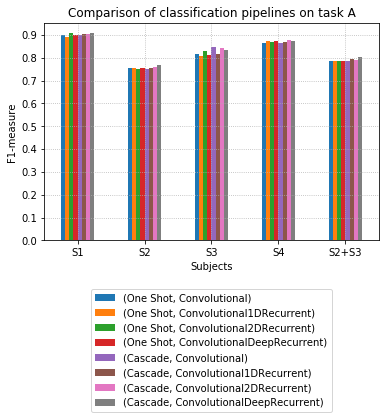

In [13]:
plt.figure()
res_A_comp2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification pipelines on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_pipeline_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Results by model
Select one model to display its 3 results on each run. The available models are the following:
- 0: Convolutional
- 1: Convolutional1DRecurrent
- 2: COnvolutional2DRecurrent
- 3: ConvolutionalDeepRecurrend

In [14]:
select_model = 0
print("Displaying results for", model_names[select_model], "model.")

Displaying results for Convolutional model.


In [15]:
res_A3 = pd.DataFrame(results[:,:,select_model].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Activity Detection", "Activity Classification", "Cascade Classification"])
res_A3

,One-Shot Classification,Activity Detection,Activity Classification,Cascade Classification
S1,0.8986,0.9500,0.9369,0.8983
S2,0.7543,0.9340,0.7774,0.7505
S3,0.8188,0.9311,0.8972,0.8481
S4,0.8644,0.9683,0.8834,0.8648
S2+S3,0.7883,0.9227,0.8383,0.7870


<Figure size 432x288 with 0 Axes>

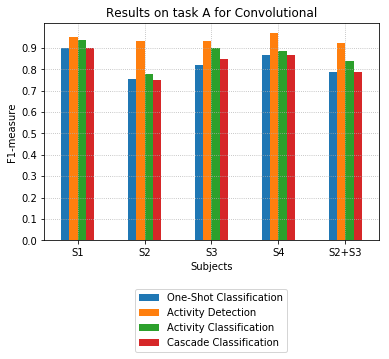

In [16]:
plt.figure()
res_A3.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Results on task A for "+model_names[select_model])
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_"+model_names[select_model]+".eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Task B

In [17]:
task = "B"
results = np.zeros([4,len(subjects),len(model_names)])
print("Results matrix has shape", results.shape)
for model in enumerate(model_names):
    for s in enumerate(subjects):
        filename = task + "_" + model[1] + "_" + str(s[1]) + ".txt"
        print("Loading", filename)
        results[:,s[0], model[0]] = np.loadtxt(datapath + filename, comments="#", delimiter="\n", unpack=False)

Results matrix has shape (4, 5, 4)
Loading B_Convolutional_1.txt
Loading B_Convolutional_2.txt
Loading B_Convolutional_3.txt
Loading B_Convolutional_4.txt
Loading B_Convolutional_23.txt
Loading B_Convolutional1DRecurrent_1.txt
Loading B_Convolutional1DRecurrent_2.txt
Loading B_Convolutional1DRecurrent_3.txt
Loading B_Convolutional1DRecurrent_4.txt
Loading B_Convolutional1DRecurrent_23.txt
Loading B_Convolutional2DRecurrent_1.txt
Loading B_Convolutional2DRecurrent_2.txt
Loading B_Convolutional2DRecurrent_3.txt
Loading B_Convolutional2DRecurrent_4.txt
Loading B_Convolutional2DRecurrent_23.txt
Loading B_ConvolutionalDeepRecurrent_1.txt
Loading B_ConvolutionalDeepRecurrent_2.txt
Loading B_ConvolutionalDeepRecurrent_3.txt
Loading B_ConvolutionalDeepRecurrent_4.txt
Loading B_ConvolutionalDeepRecurrent_23.txt


## One-Shot classification results
These results consist of the classifications performed with the null class, which are stored on the top matrix.

In [18]:
res_B1 = pd.DataFrame(results[0,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B1

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.8924,0.8872,0.8878,0.8888
S2,0.8063,0.8033,0.8134,0.8018
S3,0.8577,0.8703,0.8798,0.8662
S4,0.8448,0.8405,0.8504,0.8462
S2+S3,0.8345,0.8320,0.8359,0.8344


<Figure size 432x288 with 0 Axes>

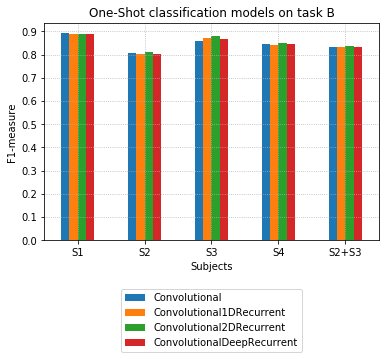

In [19]:
plt.figure()
res_B1.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("One-Shot classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_nullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Activity classification (Cascade) results
These results consist of the classifications performed without the null class, which are stored on the bottom matrix.

In [20]:
res_B2 = pd.DataFrame(results[2,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B2

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.7948,0.7879,0.8061,0.7933
S2,0.3415,0.3498,0.4049,0.3365
S3,0.7686,0.7869,0.8230,0.7539
S4,0.6569,0.6609,0.6956,0.6374
S2+S3,0.5751,0.6184,0.6409,0.5928


<Figure size 432x288 with 0 Axes>

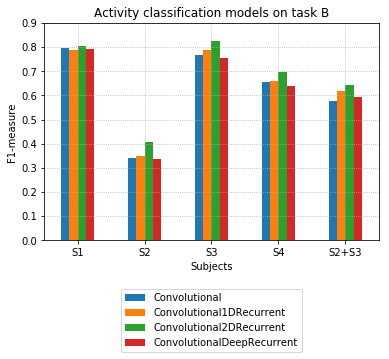

In [21]:
plt.figure()
res_B2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Activity classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_nonullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Cascade classification results

In [22]:
res_B_TS = pd.DataFrame(results[3,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B_TS

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.8915,0.8889,0.8843,0.8896
S2,0.7988,0.7989,0.8039,0.7955
S3,0.8637,0.8595,0.8727,0.8552
S4,0.8374,0.8253,0.8437,0.8271
S2+S3,0.8242,0.8217,0.8362,0.8207


<Figure size 432x288 with 0 Axes>

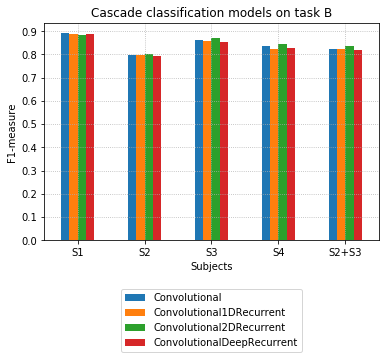

In [23]:
plt.figure()
res_B_TS.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Cascade classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_cascade.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between classifications with and without null class

In [24]:
res_B_comp = pd.concat([res_B1, res_B2], axis=1, keys=["with null class", "without null class"])
res_B_comp

with null class                                                    \
        Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1             0.8924                   0.8872                   0.8878   
S2             0.8063                   0.8033                   0.8134   
S3             0.8577                   0.8703                   0.8798   
S4             0.8448                   0.8405                   0.8504   
S2+S3          0.8345                   0.8320                   0.8359   

                                 without null class                           \
      ConvolutionalDeepRecurrent      Convolutional Convolutional1DRecurrent   
S1                        0.8888             0.7948                   0.7879   
S2                        0.8018             0.3415                   0.3498   
S3                        0.8662             0.7686                   0.7869   
S4                        0.8462             0.6569                   0.6609   
S2+S3                     0.8344             0.5751                   0.6184   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.8061                     0.7933  
S2                      0.4049                     0.3365  
S3                      0.8230                     0.7539  
S4                      0.6956                     0.6374  
S2+S3                   0.6409                     0.5928

<Figure size 432x288 with 0 Axes>

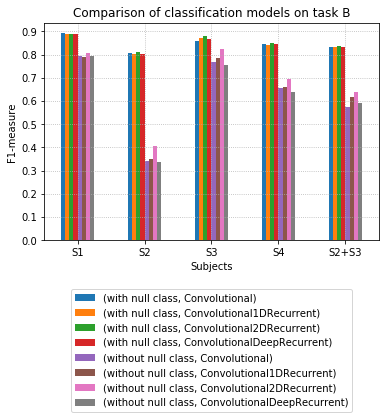

In [25]:
plt.figure()
res_B_comp.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between One Shot and Cascade classification

In [26]:
res_A_comp2 = pd.concat([res_A1, res_A_TS], axis=1, keys=["One Shot", "Cascade"])
res_A_comp2

One Shot                                                    \
      Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1           0.8986                   0.8905                   0.9073   
S2           0.7543                   0.7559                   0.7519   
S3           0.8188                   0.8078                   0.8304   
S4           0.8644                   0.8720                   0.8706   
S2+S3        0.7883                   0.7862                   0.7848   

                                       Cascade                           \
      ConvolutionalDeepRecurrent Convolutional Convolutional1DRecurrent   
S1                        0.8990        0.8983                   0.9056   
S2                        0.7553        0.7505                   0.7535   
S3                        0.8136        0.8481                   0.8148   
S4                        0.8755        0.8648                   0.8702   
S2+S3                     0.7858        0.7870                   0.7945   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.9056                     0.9080  
S2                      0.7604                     0.7665  
S3                      0.8420                     0.8358  
S4                      0.8762                     0.8729  
S2+S3                   0.7918                     0.8049

<Figure size 432x288 with 0 Axes>

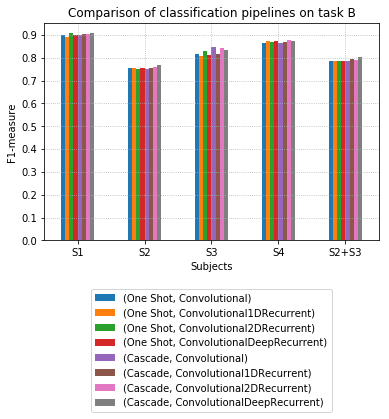

In [27]:
plt.figure()
res_A_comp2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification pipelines on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_pipeline_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Results by model
Select one model to display its 3 results on each run. The available models are the following:
- 0: Convolutional
- 1: Convolutional1DRecurrent
- 2: COnvolutional2DRecurrent
- 3: ConvolutionalDeepRecurrend

In [28]:
select_model = 0
print("Displaying results for", model_names[select_model], "model.")

Displaying results for Convolutional model.


In [29]:
res_B3 = pd.DataFrame(results[:,:,select_model].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Activity Detection", "Activity Classification", "Cascade Classification"])
res_B3

,One-Shot Classification,Activity Detection,Activity Classification,Cascade Classification
S1,0.8924,0.9261,0.7948,0.8915
S2,0.8063,0.8624,0.3415,0.7988
S3,0.8577,0.8978,0.7686,0.8637
S4,0.8448,0.8902,0.6569,0.8374
S2+S3,0.8345,0.8734,0.5751,0.8242


<Figure size 432x288 with 0 Axes>

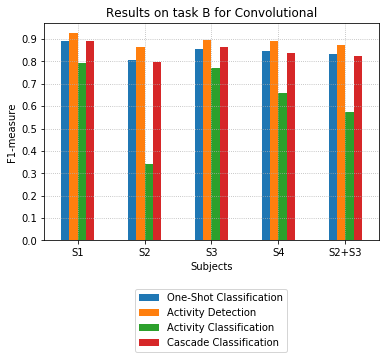

In [30]:
plt.figure()
res_B3.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Results on task B for "+model_names[select_model])
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_"+model_names[select_model]+".eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# End